# Lesson # 1 Feature Engineering

#==================================================================================================================#
Feature engineering the first part of ML modelling work. As shown in the Workflow, Data must be 
#pre-processed to clean it up and to select the right features to be used for the ML modelling

As we have discussed in the class, we will go through step by step how Feature Engineering to be performed

#==================================================================================================================#

Just to summarize: Data MUST be Clean!

The main three steps of DATA PREPROCESSINGare:

    a) Data cleaning
    b) Feature selection
    c) Data smoothing

#==================================================================================================================#

The flow of the case to be presented is as below:

a) Data Clearning
    
    1) Import important libraries to read and plot data in python

    2) Explore about the Dataset
        2a) Plot for visualization
        2b) Check if the dataset is float or object(Data must be float for ML String/or String with non.numeric are object).
        2c) Covert Unrecorded data (blank/null)/objects to numeric  
        2d) Remove nan values (blank/object)  
        2e) Duplicates Check and removal.
        2f) Save the file for further outlier removal and also feature selection analysis
    
    3) Import the saved file
        3a) Outliers removal: Check if there are outliers. Then, remove them. 
 
 b) Feature selection
 
     1) Import the outlier removed completely cleaned dataset
     2) Feature Selection based on Visual correlation analysis. The save the file
 
 c) Data filtering
 
     1) Import the feature selected file 
     2) Apply Smoothing filter if requred. 
 
Finally, Save the cleaned/featureselected/filtered data will be saved in excel with new file namme. 

The clean file will be used for step 2, which Machine lEANRING!
#================================================================================================================#

# About the Exercises

In this exercise,we will start with CLEAN SYNTHETIC DATA and continue with less/more noisy FIELD DATASET

> Example 1: Clean physics based generated synthetic data. From this, we can see that we will arrive at without data reduction

> Example 2: From the less and high noisy field data, we will see the final data reduction data due to undesired values. 


# PART 1 DATA CLEANING 

### Step 1 Import important libraieis for data explorations 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Lab 1: Clean Physics Based dataset. To test if the processor gives clean data. Therfore, you dont see data reduction 
#LogData=pd.read_excel('balisticwithoutwind.xlsx')

# Field data. Since it contains undesired data, you will see the data reductions
#Lab 2: Messy drilling data 
LogData=pd.read_excel('DrillingData.xlsx')


#=================================================================================================##
# PROJECT This is your project data...you will use the finall processed data for the ML modeling.
#LogData=pd.read_excel('LogDataProject.xlsx')
#=================================================================================================##

### Step 2 Explore/Get Information About the Row Dataset

In [2]:
# Observing the summarized information of data
# Data types (Float/object?), Unrecorded dataset based on number of non-null (recorded values) and total # of rows and column, 
# the conoum header and memory usage as well.

# We will also get first and the last dataset that displays along with the header.

print(LogData.dtypes)
LogData.info()
#LogData.head(40)
#LogData.tail(40)

x1    object
x2     int64
x3    object
x4    object
y     object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21529 entries, 0 to 21528
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      21527 non-null  object
 1   x2      21529 non-null  int64 
 2   x3      21520 non-null  object
 3   x4      21526 non-null  object
 4   y       21529 non-null  object
dtypes: int64(1), object(4)
memory usage: 841.1+ KB


In [4]:
# Dataset column may contain object (non.numeric + blanks)  and integer (int64)
# Integer should be converted to numeric (float) and the object to convert to nan, which will be deleted later 

#1  To Convert object to Float, meaning to Nan such that it will be converted to nan by 'coerce'
#=============================================================================================
#Here we will convert the object (non-numeric string) to Nan. the error = coerce will replace the value to Nan
#Syntax: df['DataFrame Column'] = pd.to_numeric(df['DataFrame Column'], errors ='coerce')
#========================================================================================================#
# Convert from each and it will return  'coerce' will convert to objects/string/blanks to nan

#LogData['Vs']= pd.to_numeric(LogData['Vs'], errors='coerce')
#LogData['DEN']= pd.to_numeric(LogData['DEN'], errors='coerce')
#LogData['NEU']= pd.to_numeric(LogData['NEU'], errors='coerce')
#LogData['Vp']= pd.to_numeric(LogData['Vp'], errors='coerce')

# Let us see the results after converting objects to numeric
# We used dtypes function.
#Results show that converting the objects to numeric, it will be written as nan and the data type becomes float. 
# The nan data /not a numeric data will be easily to delete next.
#==================================================================

# For Drilling data
LogData['x1']= pd.to_numeric(LogData['x1'], errors='coerce') # coerce gjør objects om til Nan (not a numeric)
LogData['x3']= pd.to_numeric(LogData['x3'], errors='coerce')
LogData['x4']= pd.to_numeric(LogData['x4'], errors='coerce')
LogData['y']= pd.to_numeric(LogData['y'], errors='coerce')


#2 To convert int64 to float (eg. 3 + 4.5)...we need to convert 3 (which is integer) to float so that it will be 3.0 + 4.5
#=================================================

LogData['x2'] = LogData['x2'].astype(float)

#==================================================

#print(df.dtypes)

LogData.info()
# LogData.tail(10)
LogData.head(30)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21529 entries, 0 to 21528
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      21525 non-null  float64
 1   x2      21529 non-null  float64
 2   x3      21517 non-null  float64
 3   x4      21522 non-null  float64
 4   y       21527 non-null  float64
dtypes: float64(5)
memory usage: 841.1 KB


,x1,x2,x3,x4,y
0,1324.34,3329.0,22.76,15.6,1.3101
1,1324.34,3329.0,22.76,15.6,1.3101
2,1324.37,3329.0,22.76,14.8,1.3100
3,1324.40,3333.0,22.76,16.5,1.3100
4,1324.40,3333.0,22.76,16.5,1.3100
5,1324.41,3333.0,22.76,18.1,1.3100
6,1325.63,3323.0,39.19,14.1,1.3088
7,1325.64,3331.0,38.73,16.1,1.3107
8,1325.64,3331.0,38.73,16.1,1.3107
9,1325.65,3329.0,38.28,16.4,1.3107


In [6]:
# Filling data by Replace nan to zero or to the mean value......
#Syntax: df['DataFrame Column'] = df['DataFrame Column'].replace(np.nan, 0)

#LogData = LogData.replace(np.nan,0)

# For Log Data
# LogData['X1']= LogData['X1'].replace(np.nan,0)
# LogData['X2']= LogData['X2'].replace(np.nan,0)
# LogData['Y']= LogData['Y'].replace(np.nan,0)

# Drilling Data
# LogData['x3']= LogData['x3'].replace(np.nan,0)
# LogData['x4']= LogData['x4'].replace(np.nan,0)
# LogData['x8']= LogData['x8'].replace(np.nan,0)

LogData= LogData.replace(np.nan,0)

          
#print(LogData)
#print(LogData.dtypes)
#LogData.head(20)
#LogData.tail()

#LogData.info()
                             


KeyError: 'x8'

In [6]:
# Looking at the descriptive statistics of the data. Here we use python function : describe()
LogData.describe()

,x1,x2,x3,x4,y
count,21525.000000,21529.000000,21517.000000,21522.000000,21527.000000
mean,1538.191185,3593.809234,44.599462,18.587445,1.329935
std,125.907166,30.548236,19.997178,3.141411,0.081438
min,1324.340000,3322.000000,4.430000,9.200000,1.308600
25%,1417.130000,3595.000000,26.440000,16.000000,1.322600
50%,1556.970000,3597.000000,45.640000,18.700000,1.328500
75%,1662.300000,3599.000000,63.580000,21.300000,1.337800
max,1699.730000,3609.000000,88.970000,26.300000,13.214000


### Step 3 Blank/nan removal 

In [7]:
# Here, the total number of unrecorded data will be counted from each conlums and will be displaed.
# This will later be removed along with non-numeric/string objects. 

#LogData.isna().sum()
missing_value_count = LogData.isna().sum()
print(missing_value_count)
                  
#print(LogData)
#print(LogData.dtypes)
#LogData.tail()
#LogData.info()

x1     4
x2     0
x3    12
x4     7
y      2
dtype: int64


In [8]:
# Check if there are blankes/null daata (includes: objects datatype (string, mixed numeric/non numeric and blanks), count/calculate how many?  we used isnull.sum(), function
# Get the number of missing data points per column
#Finding how many missing values are there for each column

LogData.isnull().sum()
missing_value_count = LogData.isnull().sum()
print(missing_value_count)
                  
#print(LogData)
print(LogData.dtypes)
LogData.tail()
LogData.info()          


x1     4
x2     0
x3    12
x4     7
y      2
dtype: int64
x1    float64
x2    float64
x3    float64
x4    float64
y     float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21529 entries, 0 to 21528
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      21525 non-null  float64
 1   x2      21529 non-null  float64
 2   x3      21517 non-null  float64
 3   x4      21522 non-null  float64
 4   y       21527 non-null  float64
dtypes: float64(5)
memory usage: 841.1 KB


In [9]:
# How to remove if there are blank data/ missing values (i.e All Nan values- labled)

LogData.dropna(axis =0, inplace=True)
#print(LogData)

LogData.head(20)
LogData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21505 entries, 0 to 21524
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      21505 non-null  float64
 1   x2      21505 non-null  float64
 2   x3      21505 non-null  float64
 3   x4      21505 non-null  float64
 4   y       21505 non-null  float64
dtypes: float64(5)
memory usage: 1008.0 KB


### Step 4 Duplicates removal 

In [10]:
# How to identify duplicates...use a function duplicated()

#LogData=pd.read_excel('balisticwithoutwind.xlsx')

#LogData=pd.read_excel('FeatureEngineering.xlsx')

# Calculated duplicates

dups = LogData.duplicated()
#
print(dups.any()) # If there is True will be displayed

# Display duplicates

print(LogData[dups]) # If there is True will be displayed


True
            x1      x2     x3    x4       y
1      1324.34  3329.0  22.76  15.6  1.3101
4      1324.40  3333.0  22.76  16.5  1.3100
8      1325.64  3331.0  38.73  16.1  1.3107
28     1325.86  3331.0  36.70  14.7  1.3086
30     1325.89  3328.0  36.33  13.5  1.3105
...        ...     ...    ...   ...     ...
21519  1699.70  3598.0  14.05  14.1  1.3199
21521  1699.72  3598.0  14.05  12.1  1.3199
21522  1699.72  3598.0  14.05  12.1  1.3199
21523  1699.72  3597.0  13.52  13.4  1.3199
21524  1699.71  3597.0  13.52  14.6  1.3199

[5577 rows x 5 columns]


In [11]:
#Check How to remove DUplicates: We used Drop_duplicates() function  

#LogData=pd.read_excel('FeatureEngineering.xlsx')


print('Shape before deleting duplicate values:', LogData.shape)

# Removing duplicate rows if any

LogData=LogData.drop_duplicates()
print('Shape After deleting duplicate values:', LogData.shape)

# Printing sample data
# Start observing the Quantitative/Qualitative variables
LogData.head(10)

Shape before deleting duplicate values: (21505, 5)
Shape After deleting duplicate values: (15928, 5)


,x1,x2,x3,x4,y
0,1324.34,3329.0,22.76,15.6,1.3101
2,1324.37,3329.0,22.76,14.8,1.3100
3,1324.40,3333.0,22.76,16.5,1.3100
5,1324.41,3333.0,22.76,18.1,1.3100
6,1325.63,3323.0,39.19,14.1,1.3088
7,1325.64,3331.0,38.73,16.1,1.3107
9,1325.65,3329.0,38.28,16.4,1.3107
17,1325.74,3329.0,37.86,14.6,1.3087
18,1325.75,3324.0,37.86,13.7,1.3087
19,1325.78,3329.0,37.88,15.8,1.3106


In [12]:
# Looking at sample rows in the data
LogData.info()
LogData.head()
LogData.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15928 entries, 0 to 21520
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      15928 non-null  float64
 1   x2      15928 non-null  float64
 2   x3      15928 non-null  float64
 3   x4      15928 non-null  float64
 4   y       15928 non-null  float64
dtypes: float64(5)
memory usage: 746.6 KB


,x1,x2,x3,x4,y
21495,1699.71,3597.0,13.52,14.6,1.3199
21496,1699.71,3596.0,13.52,14.4,1.3199
21497,1699.72,3597.0,13.52,13.7,1.3214
21499,1699.73,3596.0,13.52,13.6,1.3214
21520,1699.70,3599.0,14.05,14.5,13.2140


{'whiskers': [<matplotlib.lines.Line2D at 0x21b9c816400>,
 'caps': [<matplotlib.lines.Line2D at 0x21b9c816a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x21b9c84fee0>,
 'medians': [<matplotlib.lines.Line2D at 0x21b9c816f40>,
 'fliers': [<matplotlib.lines.Line2D at 0x21b9c169250>,
 'means': []}

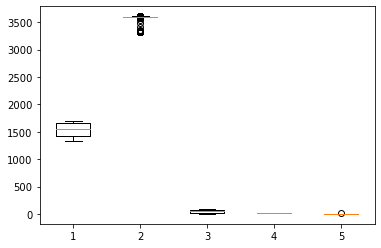

In [13]:
# Plotting histograms of multiple columns together

#LogData.hist(['V0','ang', 'Time', 'R'],figsize=(18,10))

#LogData.hist([LogData],figsize=(18,10))

#LogData = LogData.astype(float)
#print(LogData.dtypes)
#LogData=LogData.dtypes(float())

DataTobeSaved=LogData


# Printing sample rows
DataTobeSaved.head()



# Export the DataFrame to an Excel file
DataTobeSaved.to_excel('DataPreprocessingCleaned1.xlsx', index=False)


# Next step is outlier removal. Let us see the box-plot of the dataset before outlier removal

# Dataset before outlier removal
plt.boxplot(LogData,widths=0.5)

### Step 5 Outliers removal

Old Shape:  (15928, 5)
Identified outliers: 1
Non-outlier observations/Outliers removed: 15927


{'whiskers': [<matplotlib.lines.Line2D at 0x21b9cad9790>,
 'caps': [<matplotlib.lines.Line2D at 0x21b9cad9d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x21b9cad94c0>,
 'medians': [<matplotlib.lines.Line2D at 0x21b9caf4310>,
 'fliers': [<matplotlib.lines.Line2D at 0x21b9caf45e0>,
 'means': []}

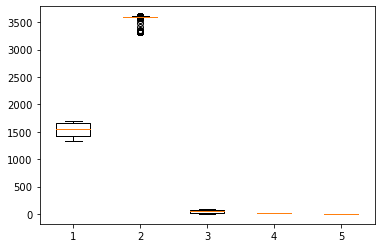

In [14]:
# Outlier detection and Removal
#Import librarties
#from numpy import mean
#from numpy import std
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# Import data
LogData=pd.read_excel('DataPreprocessingCleaned1.xlsx')



''' IQR / Upper and Lower limits computation '''
# IQR
Q1 = np.percentile(LogData['y'], 25)
Q3 = np.percentile(LogData['y'], 75)

#Q1, Q3 = np.percentile(LogData['Vp'], [25,75])
    
IQR = Q3 - Q1
 
print("Old Shape: ", LogData.shape)


#===Upper and Lower bounds/Limits===============
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)

#==============================

''' Outliers Detection/Identify based on the target Vp (example) '''
Outliers = [x for x in LogData['y'] if x < lower or x > upper]
print('Identified outliers: %d' % len(Outliers))


''' Removing the Outliers and return '''

LogData = LogData[(LogData['y']>lower)&(LogData['y']<upper)]
print('Non-outlier observations/Outliers removed: %d' % len(LogData))

LogData.describe()


#plt.boxplot(LogData['Vp'],widths=0.5)

# Dataset after outlier removal
plt.boxplot(LogData,widths=0.5)




In [15]:
# Afere clearning the data information Check
LogData.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 15927 entries, 0 to 15926
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      15927 non-null  float64
 1   x2      15927 non-null  int64  
 2   x3      15927 non-null  float64
 3   x4      15927 non-null  float64
 4   y       15927 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 746.6 KB


# PART 2 FEATURE SELECTION

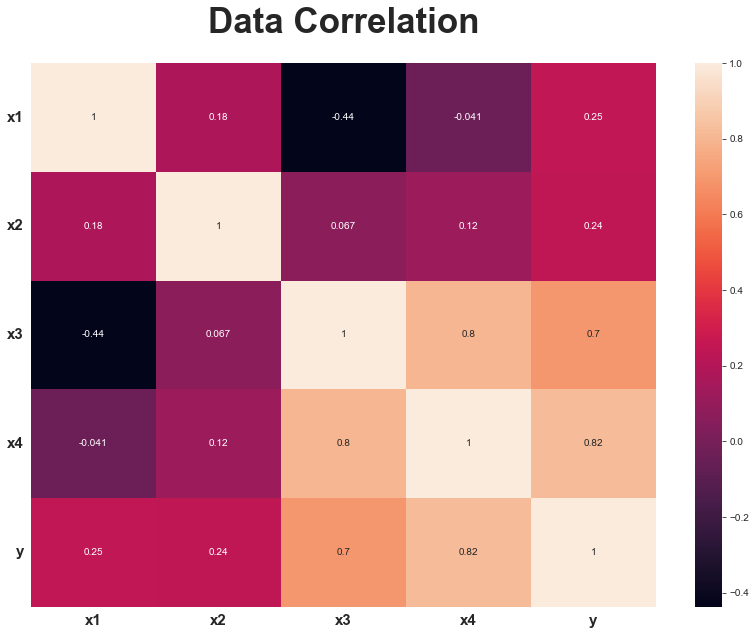

In [16]:
# Let's see the correlation from the data
# Final Step is to select the features to be used for the ML modelling


import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(14, 10)) # Set the figure
#sns.heatmap(LogData.corr(), annot=True, fmt=".2g", cmap="bone_r") # Construct a heatmap
sns.heatmap(LogData.corr(), annot=True, fmt=".2g") # Construct a heatmap

plt.title("Data Correlation", weight="bold", fontsize=35, pad=30) # Title
plt.xticks(weight="bold", fontsize=15) # X-ticks
plt.yticks(weight="bold", fontsize=15, rotation="horizontal"); # Y-ticks

In [17]:
# Calculating correlation matrix
#ContinuousCols=['V0','ang','Time','R']
#ContinuousCols=['Vs','DEN','NEU','Vp']

ContinuousCols=['x1','x2','x3','x4','y']

#ContinuousCols=['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12']
# Creating the correlation matrix
CorrelationData=LogData[ContinuousCols].corr()
CorrelationData

,x1,x2,x3,x4,y
x1,1.000000,0.179601,-0.437291,-0.040761,0.246650
x2,0.179601,1.000000,0.067163,0.121962,0.237035
x3,-0.437291,0.067163,1.000000,0.798994,0.696306
x4,-0.040761,0.121962,0.798994,1.000000,0.822015
y,0.246650,0.237035,0.696306,0.822015,1.000000


In [18]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable (eg. Vp)
# reduce the 0.5 threshold if no variable is selected

#CorrelationData['Time'][abs(CorrelationData['Time']) > 0.5 ]
CorrelationData['y'][abs(CorrelationData['y']) > 0.22 ]
#CorrelationData['R'][abs(CorrelationData['R']) > 0.5 ]
#CorrelationData['Vp'][abs(CorrelationData['Vp']) > 0.5 ]

#CorrelationData['x12'][abs(CorrelationData['x12']) > 0.5 ]

x1    0.246650
x2    0.237035
x3    0.696306
x4    0.822015
y     1.000000
Name: y, dtype: float64

# Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [19]:
#SelectedColumns=['V0','ang','Time','R']
#SelectedColumns=['Vs','DEN','NEU','Vp']

SelectedColumns=['x1','x2','x3','x4','y']
#SelectedColumns=['X2','Y']

#SelectedColumns=['x1','x2','x4','x6','x7','x8','x12']

# Selecting final columns
DataForML=LogData[SelectedColumns]
DataForML.head()

,x1,x2,x3,x4,y
0,1324.34,3329,22.76,15.6,1.3101
1,1324.37,3329,22.76,14.8,1.3100
2,1324.40,3333,22.76,16.5,1.3100
3,1324.41,3333,22.76,18.1,1.3100
4,1325.63,3323,39.19,14.1,1.3088


# Saving the Cleaned Dataset in Excel , which is to be used for ML modelling. 

In [20]:
#The Cleanded File Called LogData wil be saveed as New File File Name

DataTobeSaved=DataForML


# Printing sample rows
DataTobeSaved.head()
DataTobeSaved.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15927 entries, 0 to 15926
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      15927 non-null  float64
 1   x2      15927 non-null  int64  
 2   x3      15927 non-null  float64
 3   x4      15927 non-null  float64
 4   y       15927 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 746.6 KB


In [21]:
# Check if the number is lower than then original, which is the cleaned one. The original was 300, but the cleaned one is 300. 
# It means that here, the synthetic data was cleaned already and ther was no removal (blank, outliers, null,duplicates) of data 
print(LogData.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15927 entries, 0 to 15926
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      15927 non-null  float64
 1   x2      15927 non-null  int64  
 2   x3      15927 non-null  float64
 3   x4      15927 non-null  float64
 4   y       15927 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 746.6 KB
None


# Saving the Cleanded Data with New File Name ''balisticwithoutwindCleaned''

In [22]:
import pandas as pd

# Export the DataFrame to an Excel file
#DataTobeSaved.to_excel('DataProcessingCleanedBalisticFinal.xlsx', index=False)
DataTobeSaved.to_excel('DataProcessingCleanedLogFinal.xlsx', index=False)

In [23]:
data = pd.read_excel('DataProcessingCleanedLogFinal.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15927 entries, 0 to 15926
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      15927 non-null  float64
 1   x2      15927 non-null  int64  
 2   x3      15927 non-null  float64
 3   x4      15927 non-null  float64
 4   y       15927 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 622.3 KB


# PART 3 Data Filtering Technique optional
We can apply this after selecting the final predictors for Machine Learning

After applying the filters, we will then save as Excel to be used for ML modelling.

Rememeber that before applying this, you need to analyze how the data contains spikes and decide to apply the smoothing function.

In this following two smoothing functions will be presented.

             > a) Moving average

             > b) Exponential Smoothing 
You can also apply the ML modelling on smoothed and unsmothed data set.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15927 entries, 0 to 15926
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      15908 non-null  float64
 1   x2      15908 non-null  float64
 2   x3      15908 non-null  float64
 3   x4      15908 non-null  float64
 4   y       15908 non-null  float64
dtypes: float64(5)
memory usage: 622.3 KB


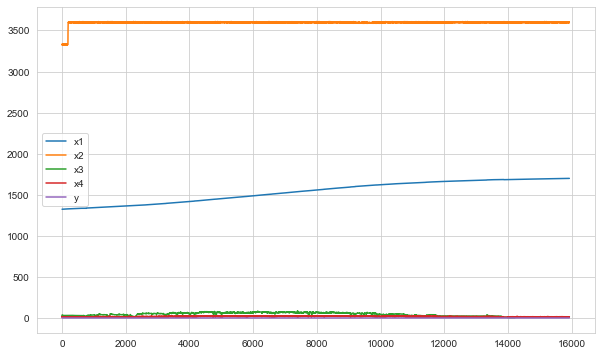

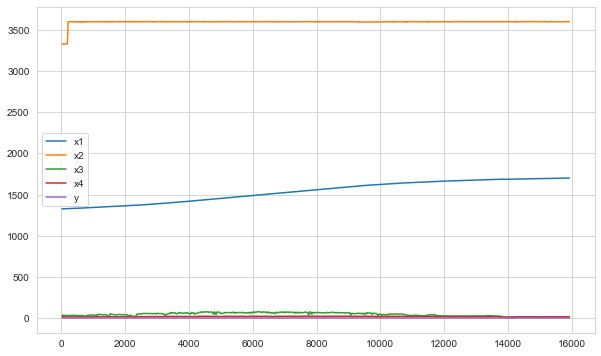

In [24]:
#Application of moving average Filter On ROP data

import pandas as pd
import matplotlib.pyplot as plt

#df = pd.read_excel('DataProcessingCleanedBalisticFinal.xlsx')
df = pd.read_excel('DataProcessingCleanedLogFinal.xlsx')


#plt.plot
data = df.plot(figsize=(10,6))
dataFiltered = df.rolling(window =20).mean().plot(figsize=(10,6))
dataF = df.rolling(window =20).mean()
dataF.info()

In [25]:
# #The Cleanded and Filtered data wil be saveed as New File File Name

import pandas as pd

DataForMLFiltered=dataF

DataTobeSavedFiltered=DataForMLFiltered

# Printing sample rows
DataTobeSavedFiltered.head()
DataTobeSavedFiltered.info()


# Export the DataFrame to an Excel file
DataTobeSavedFiltered.to_excel('DataProcessingCleanedLogFinalFiltered.xlsx', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15927 entries, 0 to 15926
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      15908 non-null  float64
 1   x2      15908 non-null  float64
 2   x3      15908 non-null  float64
 3   x4      15908 non-null  float64
 4   y       15908 non-null  float64
dtypes: float64(5)
memory usage: 622.3 KB


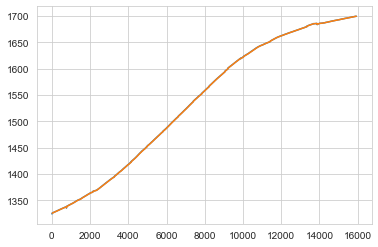

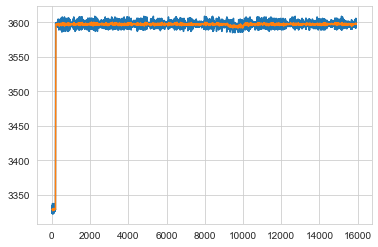

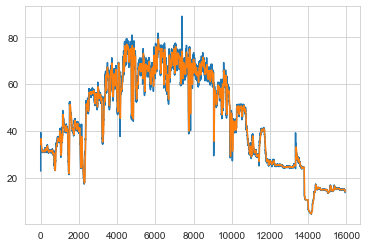

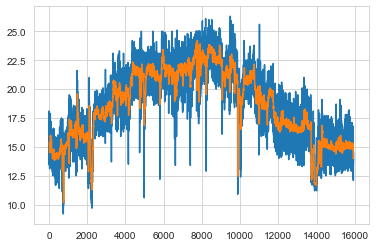

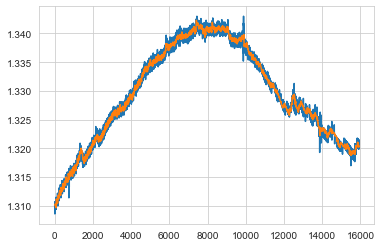

In [26]:
# Plotting the Filtered and Unfiltered dataset

import pandas as pd

#dataunfiltered = pd.read_excel('DataProcessingCleanedBalisticFinal.xlsx')
#datafiltered = pd.read_excel('DataProcessingCleanedFinalFilteredBalistic.xlsx')

dataunfiltered = pd.read_excel('DataProcessingCleanedLogFinal.xlsx')
datafiltered = pd.read_excel('DataProcessingCleanedLogFinalFiltered.xlsx')

plt.plot(dataunfiltered['x1'])
plt.plot(datafiltered['x1'])
plt.show()
plt.plot(dataunfiltered['x2'])
plt.plot(datafiltered['x2'])
plt.show()
plt.plot(dataunfiltered['x3'])
plt.plot(datafiltered['x3'])
plt.show()
plt.plot(dataunfiltered['x4'])
plt.plot(datafiltered['x4'])
plt.show()
plt.plot(dataunfiltered['y'])
plt.plot(datafiltered['y'])
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15927 entries, 0 to 15926
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      15927 non-null  float64
 1   x2      15927 non-null  int64  
 2   x3      15927 non-null  float64
 3   x4      15927 non-null  float64
 4   y       15927 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 622.3 KB


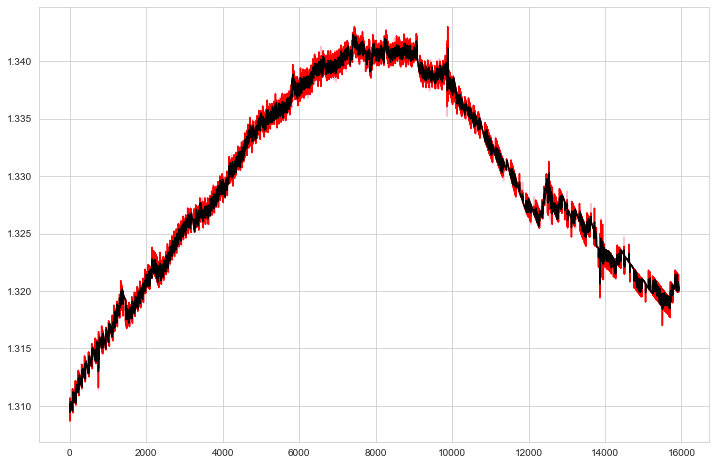

In [27]:
# Application Exponential Smoothing average 
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

df = pd.read_excel('DataProcessingCleanedLogFinal.xlsx')
df.info()

model = SimpleExpSmoothing(df['y'])
fit_model= model.fit(smoothing_level = 0.285, optimized = False)

# Moving Average
MVA = df['y'].rolling(window=2).mean()

# Plotting Comparisons
plt.figure(figsize= (12,8))

plt.plot(df['y'], color ='pink')

plt.plot(MVA, color ='red')

plt.plot(fit_model.fittedvalues, color ='black')



# Final Analysis


Your task


> Comparing the orignal physics based synthetic and the Final pre-processed data, is the final datase reduced? is it as expected?


> Comparing the Orignal field dataset and the Final pre-processed data, is the final data reduced? is it as expected? 


# Rememeber 

 >The final cleaned data will be used for Machine Learning modelling.

> Using the data pre-processing examples presented above, you can start working on your project dataset and make ready the data for ML modelling.

> After Data Processing lecture (i.e, Lecture # 1), we will go through the ML alogorthis (the concepts, the mathematics/statistics), how they work. 

> After having the Machine Learning lectures (i.e, Lectures # 2- 4 and Laboratory Exercises), you will applying the ML alogorithms on your cleaned data and work on the modelling and evalulation.

